# Autoencoder Assignment-4

In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
train_on_gpu = torch.cuda.is_available()

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor(),download = True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=100, shuffle=True)

In [12]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - ETA:  - ETA: 24 - ETA: 18 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 16 - ETA: 12 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA: 

In [13]:
X_train = np.reshape(X_train,[-1,28*28])
X_test = np.reshape(X_test,[-1,28*28])
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [19]:
def random_ip(model,l1=False):    
    %matplotlib inline

    images = np.float32(128 + 50*np.random.randn(1,1,28,28))/255
    images=torch.from_numpy(images).float().cuda()
    images=images.view(-1,1,784)

    
    if(l1==False):
        output=model(images)
    if(l1==True):
        output,_=model(images)

    images=images.view(-1,1,28,28)
    output=output.view(-1,1,28,28)

    plt.subplot(1,2,1)
    images=images.cpu()
    plt.imshow(images[0][0],cmap='gray')
    plt.subplot(1,2,2)
    output=output.cpu().detach().numpy()
    plt.imshow(output[0][0],cmap='gray')

In [20]:
def sample_ip_op(model,l1=False):
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=2, shuffle=True)
# obtain one batch of test images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()
    images=images.cuda()
    images=images.view(-1,1,784)


    if(l1==False):
        output=model(images)
    if(l1==True):
        output,_=model(images)

    images=images.view(-1,1,28,28)
    output=output.view(-1,1,28,28)

    plt.subplot(1,2,1)
    images=images.cpu()
    plt.imshow(images[0][0],cmap='gray')
    plt.subplot(1,2,2)
    output=output.cpu().detach().numpy()
    plt.imshow(output[0][0],cmap='gray')


In [43]:
def test_the_reconstruction(model,l1=False):    
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=10000, shuffle=True)
    model_loss=0
    criterion = nn.MSELoss()
    with torch.no_grad():
        for images,labels in test_loader:
            images= images.view(images.size(0), -1)
            images=images.cuda()
        #images=images.view(-1,1,784)
            if(l1==False):
                outputs=model(images)
            if(l1==True):
                outputs,_=model(images)
            loss=criterion(outputs,images)
            
            model_loss=model_loss+loss.data.item()
        print("loss:",model_loss)
        
    return model_loss
    


In [22]:
def vis_filter(model):
    a=list(model.parameters())[0].data.cpu().numpy()

    plt.figure(figsize=(20,10))
    for i in range(a.shape[0]):
        plt.subplot(8,a.shape[0]/8,i+1)
        plt.imshow(a[i,:].reshape(28,28),cmap='gray')
    plt.tight_layout()
    plt.show()

In [54]:
def train(model,num_epochs,criterion,optimizer,l1=False):
    losses=[]
    for i in range(num_epochs):
        epoch_loss=0
        for images,labels in train_loader:
            images= images.view(images.size(0), -1)
            images=images.cuda()
            #images=images.view(-1,1,784)
            optimizer.zero_grad()

            if(l1==False):
                outputs=model(images)
            if(l1==True):
                outputs,_=model(images)
            loss=criterion(outputs,images)
            epoch_loss=epoch_loss+loss.data.item()
            loss.backward()
            optimizer.step()
        losses.append(epoch_loss)
        print("Epoch:",i+1,"loss:",epoch_loss)
           
    return losses


In [24]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=128)
        self.fc4 = nn.Linear(in_features=128, out_features=30)
        self.fc5 = nn.Linear(in_features=30, out_features=128)
        self.fc6 = nn.Linear(in_features=128, out_features=256)
        self.fc7 = nn.Linear(in_features=256, out_features=784)

    def forward(self, x):
        #print(x.shape)
        #x=x.view(-1,1,784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        
        return x

In [25]:
class simpleAE(nn.Module):
    def __init__(self,num_dim):
        super(simpleAE, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=num_dim)
        self.fc2 = nn.Linear(in_features=num_dim, out_features=784)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

In [26]:
class simpleAEL1(nn.Module):
    def __init__(self,num_dim):
        super(simpleAEL1, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=num_dim)
        self.fc2 = nn.Linear(in_features=num_dim, out_features=784)
        
    def forward(self, x):
        a = F.relu(self.fc1(x))
        b = self.fc2(a)
        return b,a

In [27]:
def trainl1(model,num_epochs,criterion,optimizer,alpha):
    losses=[]
    for i in range(num_epochs):
        epoch_loss=0
        for images,labels in train_loader:
            images= images.view(images.size(0), -1)
            images=images.cuda()
            #images=images.view(-1,1,784)
            optimizer.zero_grad()
            outputs,activ=model(images)
            loss=criterion(outputs,images)+ alpha*torch.norm(activ,p=1)/(activ.size()[0]*784)
            epoch_loss=epoch_loss+loss.data.item()
            loss.backward()
            optimizer.step()
        losses.append(epoch_loss)
        print("Epoch:",i+1,"loss:",epoch_loss)
           
    return losses

# Question 1

# PCA

In [17]:
def visualize_reshape(im1,im2):
  Im1 = np.reshape(im1,[28,28])
  Im2 = np.reshape(im2,[28,28])
  plt.subplot(1,2,1)
  plt.imshow(Im1,'gray')
  plt.subplot(1,2,2)
  plt.imshow(Im2,'gray')
  plt.show()

In [14]:
class PCA:
  def __init__(self,data,k):
    data = data - np.mean(data)
    self.data = data/np.std(data)
    cov = np.dot(data.T,data)
    L,Q = np.linalg.eigh(cov)
    top_k = np.argsort(L)[::-1][:k]
    self.Q = Q[:,top_k]

  def PCA_Encode(self,data):
    Encoded = np.dot(data,self.Q)
    return Encoded
  
  def PCA_recons(self,Enc):
    Dec = np.dot(Enc,self.Q.T)
    return Dec

In [15]:
pca = PCA(X_train,30)
Encoded = pca.PCA_Encode(X_test)
Decoded = pca.PCA_recons(Encoded)
print("Reconstruction Error: " + str(np.mean(np.square(X_test-Decoded))))

Reconstruction Error: 0.18798476258462946


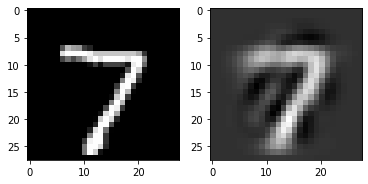

In [18]:
visualize_reshape(X_test[0],Decoded[0])

# Autoencoder

In [28]:
model= AE()
model.cuda()

from torchsummary import summary
summary(model, input_size=(1,784))

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# specify loss function
criterion = nn.MSELoss(reduction='sum')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]         401,920
            Linear-2               [-1, 1, 256]         131,328
            Linear-3               [-1, 1, 128]          32,896
            Linear-4                [-1, 1, 30]           3,870
            Linear-5               [-1, 1, 128]           3,968
            Linear-6               [-1, 1, 256]          33,024
            Linear-7               [-1, 1, 784]         201,488
Total params: 808,494
Trainable params: 808,494
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.08
Estimated Total Size (MB): 3.10
----------------------------------------------------------------


In [29]:
#train(model,10,criterion,optimizer)

#torch.save(model.state_dict(),'./firstae.pth')

#Later to restore:
model.load_state_dict(torch.load('./firstae.pth'))
model.eval()

AE(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=30, bias=True)
  (fc5): Linear(in_features=30, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=256, bias=True)
  (fc7): Linear(in_features=256, out_features=784, bias=True)
)

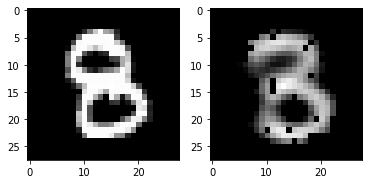

In [46]:
sample_ip_op(model)

In [45]:
test_the_reconstruction(model)

loss: 0.032942917197942734


0.032942917197942734

# Question2

In [55]:
simple_ae_64= simpleAE(64)
simple_ae_64.cuda()
from torchsummary import summary
summary(simple_ae_64, input_size=(1,784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
            Linear-2               [-1, 1, 784]          50,960
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


In [56]:
optimizer64 = torch.optim.Adam(simple_ae_64.parameters(), lr=0.01)
# specify loss function
criterion = nn.MSELoss()


In [57]:
train(simple_ae_64,10,criterion,optimizer64)

Epoch: 1 loss: 17.922939646989107
Epoch: 2 loss: 16.002029977738857
Epoch: 3 loss: 15.903839021921158
Epoch: 4 loss: 15.90232384391129
Epoch: 5 loss: 15.87147624976933
Epoch: 6 loss: 15.866480518132448
Epoch: 7 loss: 15.865864995867014
Epoch: 8 loss: 15.842692464590073
Epoch: 9 loss: 15.866349151358008
Epoch: 10 loss: 15.832328820601106


[17.922939646989107,
 16.002029977738857,
 15.903839021921158,
 15.90232384391129,
 15.87147624976933,
 15.866480518132448,
 15.865864995867014,
 15.842692464590073,
 15.866349151358008,
 15.832328820601106]

In [8]:
#torch.save(simple_ae_64.state_dict(),'./simple64ae.pth')

#Later to restore:
simple_ae_64.load_state_dict(torch.load('./simple64ae.pth'))
simple_ae_64.eval()

simpleAE(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=784, bias=True)
)

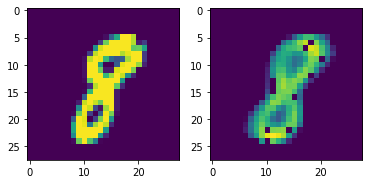

In [88]:
sample_ip_op(model)

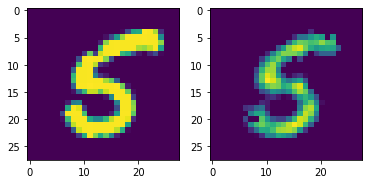

In [89]:
sample_ip_op(simple_ae_64)

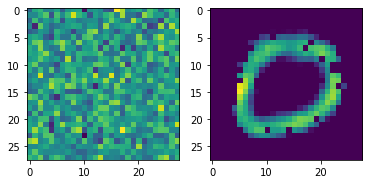

In [90]:
random_ip(model)

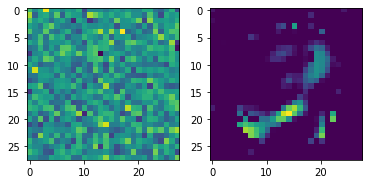

In [91]:
random_ip(simple_ae_64)

In [16]:
simple_ae_128= simpleAE(128)
simple_ae_128.cuda()
from torchsummary import summary
summary(simple_ae_128, input_size=(1,784))
optimizer128 = torch.optim.Adam(simple_ae_128.parameters(), lr=0.01)
# specify loss function
criterion = nn.MSELoss()


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
            Linear-2               [-1, 1, 784]         101,136
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.77
Estimated Total Size (MB): 0.78
----------------------------------------------------------------


In [17]:
#train(simple_ae_128,10,criterion,optimizer128)
#torch.save(simple_ae_128.state_dict(),'./simple128ae.pth')

#Later to restore:
simple_ae_128.load_state_dict(torch.load('./simple128ae.pth'))
simple_ae_128.eval()

simpleAE(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=784, bias=True)
)

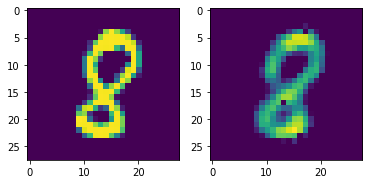

In [18]:
sample_ip_op(simple_ae_128)

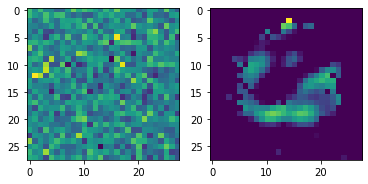

In [19]:
random_ip(simple_ae_128)

# Reconstruction Error Comparison

In [142]:
test_the_reconstruction(model,)

avg.loss: 3.2942919973284006


3.2942919973284006

In [143]:
test_the_reconstruction(simple_ae_64)

avg.loss: 1.964460875838995


1.964460875838995

In [144]:
test_the_reconstruction(simple_ae_128)

avg.loss: 2.250606944784522


2.250606944784522

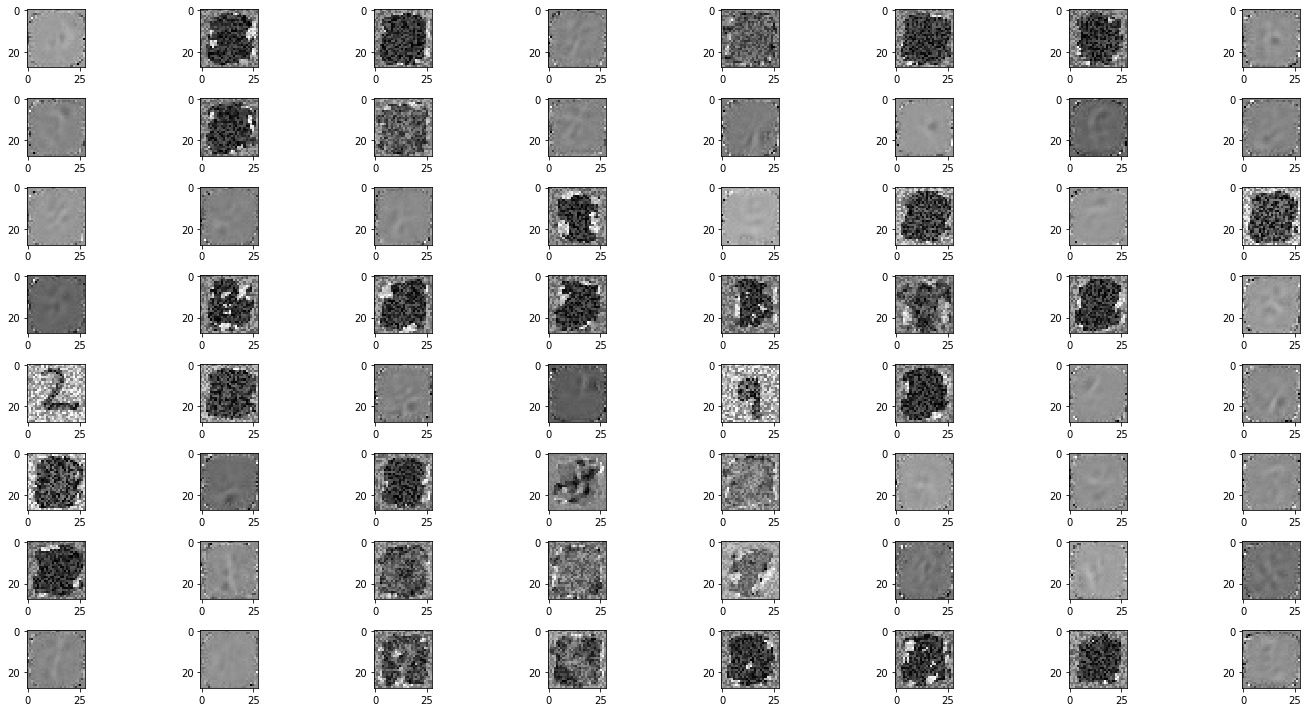

In [74]:
vis_filter(simple_ae_64)

In [33]:
simple_ae_1024_l1= simpleAEL1(1024)
simple_ae_1024_l1.cuda()
from torchsummary import summary
summary(simple_ae_1024_l1, input_size=(1,784))
optimizer1024_l1 = torch.optim.Adam(simple_ae_1024_l1.parameters(), lr=0.01)
# specify loss function
criterion = nn.MSELoss()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1024]         803,840
            Linear-2               [-1, 1, 784]         803,600
Total params: 1,607,440
Trainable params: 1,607,440
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 6.13
Estimated Total Size (MB): 6.15
----------------------------------------------------------------


In [37]:
trainl1(simple_ae_1024_l1,5,criterion,optimizer1024_l1,0.0)
torch.save(simple_ae_1024_l1.state_dict(),'./simple1024ael1.pth')

#Later to restore:
#simple_ae_128.load_state_dict(torch.load('./simple128ae.pth'))
#simple_ae_128.eval()

Epoch: 1 loss: 23.19295011460781
Epoch: 2 loss: 23.26230652630329
Epoch: 3 loss: 23.229672696441412
Epoch: 4 loss: 23.23498309403658
Epoch: 5 loss: 23.257643442600965


In [38]:
test_the_reconstruction(simple_ae_1024_l1,True)

avg.loss: 3.8299401216208935


3.8299401216208935

In [23]:
#vis_filter(simple_ae_1024_l1)

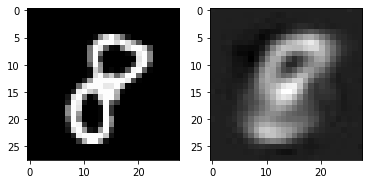

In [39]:
sample_ip_op(simple_ae_1024_l1,True)

# Question-5: Manifold Learning

In [57]:
class q5(nn.Module):
    def __init__(self):
        super(q5, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=8)
        self.fc3 = nn.Linear(in_features=8, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=784)

    def forward(self, x):
        a = F.relu(self.fc1(x))
        b = F.relu(self.fc2(a))
        c = F.relu(self.fc3(b))
        d = F.relu(self.fc4(c))
        
        return d,b

In [58]:
mani= q5()
mani.cuda()
from torchsummary import summary
summary(mani, input_size=(1,784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
            Linear-2                 [-1, 1, 8]             520
            Linear-3                [-1, 1, 64]             576
            Linear-4               [-1, 1, 784]          50,960
Total params: 102,296
Trainable params: 102,296
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


In [59]:
optimizer_mani = torch.optim.Adam(mani.parameters(), lr=0.01)
# specify loss function
criterion = nn.MSELoss()

train(mani,10,criterion,optimizer_mani,l1=True)

Epoch: 1 loss: 25.148954182863235
Epoch: 2 loss: 21.422783257439733
Epoch: 3 loss: 21.094730446115136
Epoch: 4 loss: 21.000947516411543
Epoch: 5 loss: 20.897881405428052
Epoch: 6 loss: 20.82704473659396
Epoch: 7 loss: 20.732082163915038
Epoch: 8 loss: 20.662711886689067
Epoch: 9 loss: 20.649245658889413
Epoch: 10 loss: 20.60754812695086


[25.148954182863235,
 21.422783257439733,
 21.094730446115136,
 21.000947516411543,
 20.897881405428052,
 20.82704473659396,
 20.732082163915038,
 20.662711886689067,
 20.649245658889413,
 20.60754812695086]

In [60]:
torch.save(mani.state_dict(),'./manifoldq5.pth')

#Later to restore:
#mani.load_state_dict(torch.load('./manifoldq5.pth'))
#mani.eval()

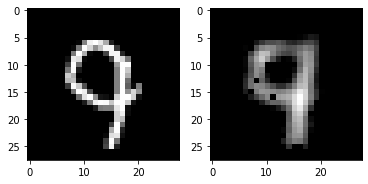

In [62]:
sample_ip_op(mani,l1=True)

In [64]:
test_the_reconstruction(mani,l1=True)

loss: 0.034002408385276794


0.034002408385276794

In [100]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=1, shuffle=True)
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images=images.cuda()
images=images.view(-1,1,784)
outputs,hidden=mani(images)

## Moving randomly on hidden layer

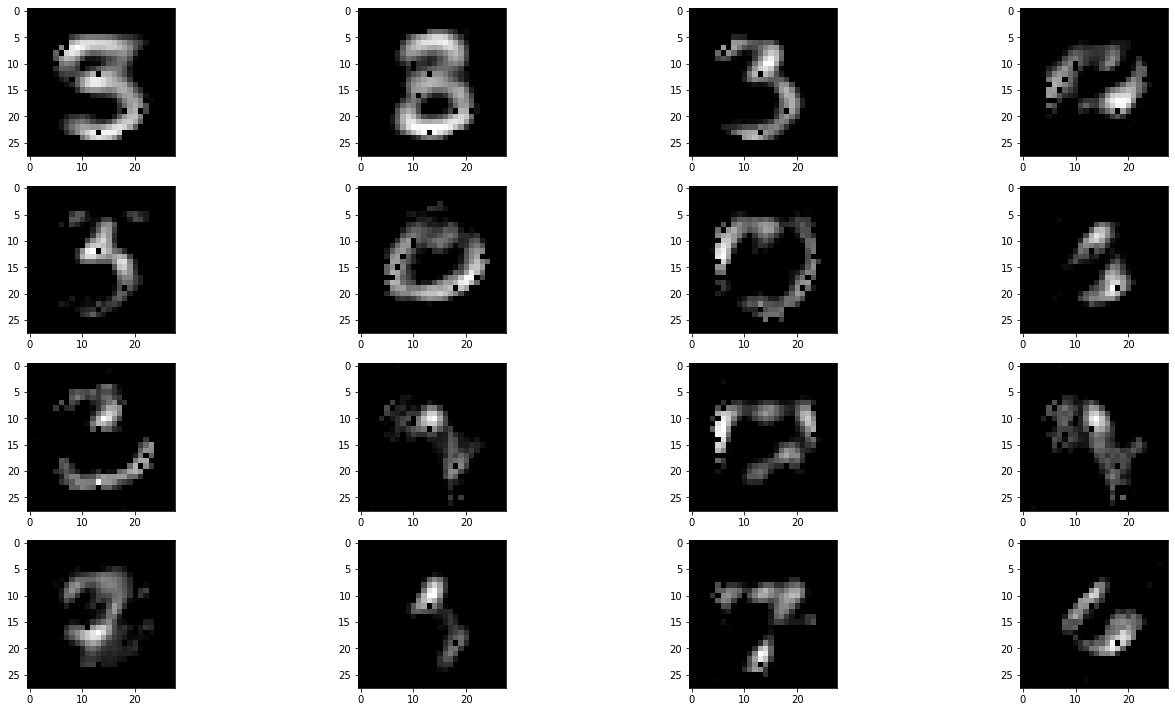

In [103]:

plt.figure(figsize=(20,10))
for i in range(16):
    hiddennew=hidden + 0.5*i*torch.randn(1,1,8).cuda()

    op1=F.relu(mani.fc3(hiddennew))
    op2=F.relu(mani.fc4(op1))
    op2=op2.view(-1,1,28,28)
    plt.subplot(4,4,i+1)
    op2=op2.cpu().detach().numpy()
    plt.imshow(op2[0][0],cmap='gray')
plt.tight_layout()
plt.show()

## Moving Randomly on image manifold

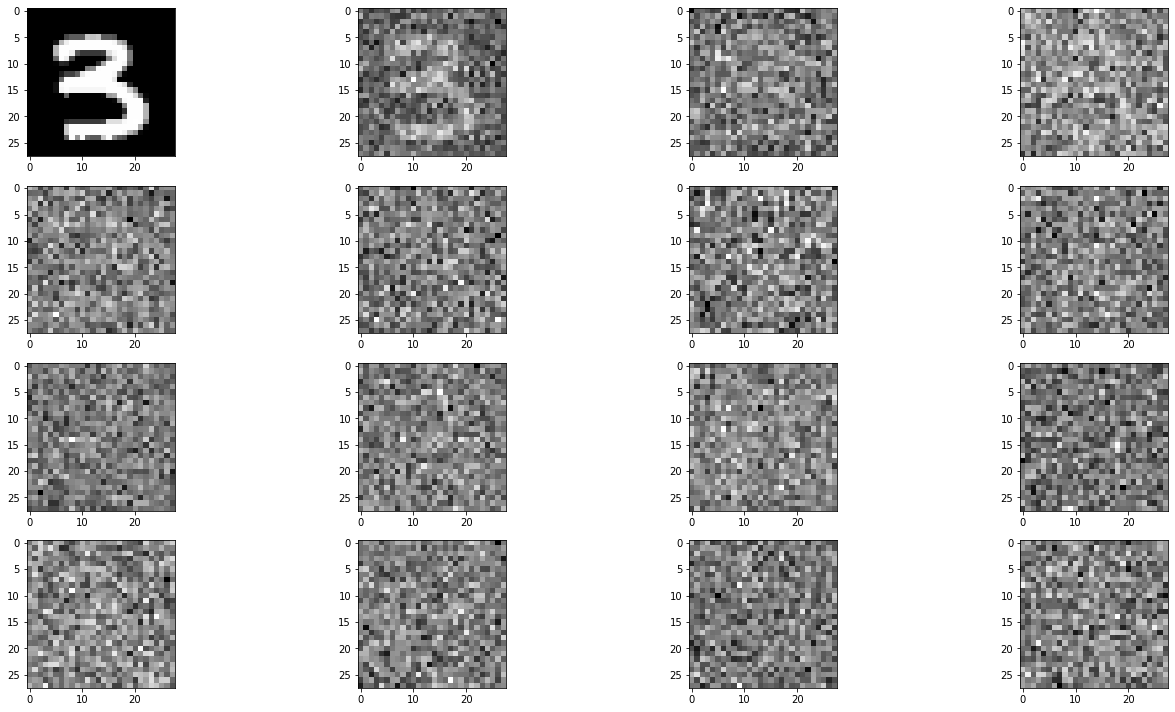

In [115]:
plt.figure(figsize=(20,10))
for i in range(16):
    rand_img=images+ 0.5*i*torch.randn(1,1,784).cuda()
    rand_img=rand_img.view(-1,1,28,28)
    rand_img=rand_img.cpu().detach().numpy()
    plt.subplot(4,4,i+1)
    plt.imshow(rand_img[0][0],cmap='gray')
plt.tight_layout()
plt.show()